In [1]:
import pandas as pd
import io
import zipfile
import requests
import geopandas as gpd
import shapely.geometry
from shapely.geometry import Point
import pyproj
import numpy as np
import matplotlib.pyplot as plt
import math
import os, sys

from skimage.feature import hog
from skimage import data, exposure

print ("Imported!")

Imported!


In [2]:
#set up survey file paths

survey = "HI1509"

path = '..//..//..//Documents//Test_sets//Testing_Sample//HI1509//Scale_25000//Edits//'
pathshp = '..//..//..//Documents//Test_sets//Testing_Sample//HI1509'

array = np.load(path + 'array10m//arraymean.npy')
arraySS = np.load(path + 'array10m//arraySS.npy')

geosurveyp = pd.read_csv(path + 'HI1509_EPSG3035')
ss = pd.read_csv(path+'HI1509_SS.csv')

breakdown = 1

In [3]:
# step is the size of the gridding used (e.g. 10m by 10m)

step = 10
hogval = 5
savepath = '..//..//..//Documents//Test_sets//Testing_Sample//HOG_testsets_10m//maxonly//Mean'

In [4]:
#find the corners of the projected dataset and the min/max depth for plotting

minx = geosurveyp['Xp'].min()
maxx = geosurveyp['Xp'].max()
rangex = maxx-minx

print (minx, maxx, rangex)

miny = geosurveyp['Yp'].min()
maxy = geosurveyp['Yp'].max()
rangey = maxy-miny

print ( miny, maxy, rangey)

minz = geosurveyp['Depth'].min()
maxz = geosurveyp['Depth'].max()

3358785.38429 3365607.23965 6821.8553576
3646075.70214 3649540.16276 3464.46061328


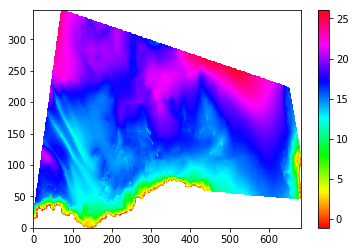

In [5]:
#col is the number of columns in the gridded dataset, rows the number of rows (found by dividing the length of each side in m by the step)
#plot the gridded survey to check it looks reasonable

col = math.ceil(rangex/step)
row = math.ceil(rangey/step)

xi = np.arange(0, col)
yi = np.arange(0, row)
X, Y = np.meshgrid(xi, yi)
Z = array[Y,X]

import numpy.ma as ma
Lm = ma.masked_where(np.isnan(Z),Z)

plt.pcolor(X, Y, Lm, cmap='hsv', vmin=minz, vmax=maxz)
plt.colorbar()

plt.show()

In [6]:
array.shape

(347, 683)

In [7]:

#array[np.isnan(array)] = np.nanmin(array)

# array[np.isnan(array)] = -1

In [8]:
# print(np.nanmin(array))

In [9]:
# val = float(np.nanmin(array)) - 1
# print(val)

In [10]:
# array[np.isnan(array)] = val

In [11]:
# print(np.nanmin(array),val)

/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


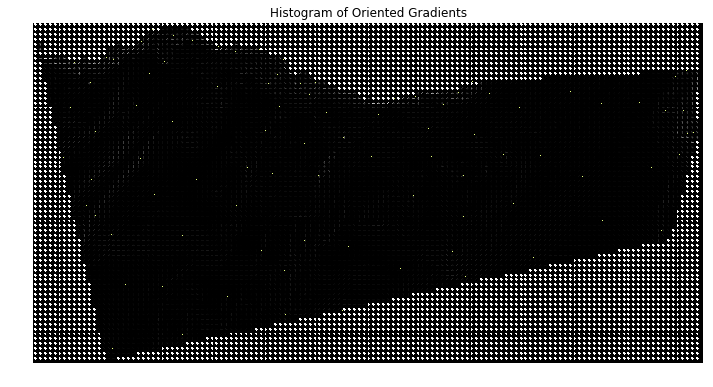

In [12]:
#HOG 

image = array

fd, hog_image = hog(image, orientations=4, pixels_per_cell=(hogval,hogval), cells_per_block=(1,1), visualise=True, feature_vector= False)

fig, (ax2) = plt.subplots(figsize=(12, 12))

#moved up arraySS = np.load(path + 'array5m//arraySS.npy')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

import numpy.ma as ma
Zm = ma.masked_equal(arraySS, 0)

ax2.axis('off')
im1 = ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
im2 = ax2.imshow(Zm,cmap=plt.cm.Wistia)
ax2.set_title('Histogram of Oriented Gradients')
# ax1.set_adjustable('box-forced')
plt.show()

In [13]:
#HOG produces a 4d array (row, col, block r,block c, then the 4 orientation values )
fd.shape

(69, 136, 1, 1, 4)

In [14]:
# create empty dataframe for output
HOG_output = pd.DataFrame()

In [15]:
rowH = int(fd.shape[0])
colH = int(fd.shape[1])

In [16]:
for r in range(0,fd.shape[0]):
    for c in range(0,fd.shape[1]):
        for a in range(0,1):
            for b in range(0,1):
                rown = [r,c,(fd[r][c][a][b][0]),(fd[r][c][a][b][1]),(fd[r][c][a][b][2]),(fd[r][c][a][b][3])]
                HOG_output = HOG_output.append([rown])
                print (fd[r][c][a][b])

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ 0.05734663  0.05546895  0.39620346  0.49094629]
[ 0.1664737   0.07005511  0.22592801  0.53750842]
[ 0.06650951  0.83523542  0.09823462  0.        ]
[ 0.04335029  0.05063683  0.75724639  0.14874934]
[ 0.10614984  0.41699476  0.25578089  0.22104756]
[ 0.56431085  0.34930394  0.08636681  0.        ]
[ 0.          0.3967583   0.60321029  0.        ]
[ 0.06982232  0.24180551  0.2577416   0.43059553]
[ 0.          0.06162946  0.7611223   0.17722369]
[ 0.06531312  0.          0.67885002  0.25582277]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan 

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.17644204  0.82352717  0.        ]
[ 0.          0.          0.95886516  0.04111421]
[ 0.          0.          0.71462725  0.28536163]
[ 0.          0.31958522  0.68040445  0.        ]
[ 0.          0.1246493   0.78150651  0.09383113]
[ 0.16194043  0.49701587  0.06008003  0.28095173]
[ 0.04391999  0.24468338  0.63046608  0.08091982]
[ 0.          0.86421633  0.13577237  0.        ]
[ 0.          0.38224931  0.61773328  0.        ]
[ 0.04509569  0.10191849  0.60937343  0.24360104]
[ 0.03475646  0.3760783   0.58915528  0.        ]
[ 0.04541922  0.72808809  0.22648183  0.        ]
[ 0.33592781  0.49832243  0.10192003  0.0638127 ]
[ 0.11029049  0.75550794  0.13418506  0.        ]
[ 0.          0.55264564  0.44734114  0.        ]
[ 0.52005034  0.47494841  0.0049879   0.        ]
[ 0.          0.9265253   0.07333596  0.        ]
[ 0.18185747  0.41

[ 0.29983459  0.          0.33654015  0.36359367]
[ 0.32449673  0.          0.13317493  0.54230528]
[ 0.          0.          0.36107678  0.63889077]
[ 0.          0.          0.54524873  0.45474268]
[ nan  nan  nan  nan]
[ 0.          0.69782842  0.30215684  0.        ]
[ 0.40568196  0.06194327  0.32865528  0.20369151]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  n

[ 0.          0.78422878  0.21560191  0.        ]
[ 0.0456822   0.32410124  0.50760275  0.12239995]
[ 0.53563574  0.          0.06545293  0.39875934]
[ 0.38018313  0.          0.08093294  0.53853415]
[ 0.60947953  0.36360729  0.          0.02666774]
[ 0.25851077  0.74129078  0.          0.        ]
[ 0.38106428  0.22729879  0.35216318  0.03926875]
[ 0.03649873  0.4320204   0.358004    0.17321895]
[ 0.          0.97882612  0.02101176  0.        ]
[ 0.01213934  0.46177483  0.48942231  0.03645298]
[ 0.57730283  0.40923638  0.          0.01326351]
[ 0.          0.89874973  0.10108755  0.        ]
[ 0.52791564  0.47187387  0.          0.        ]
[ 0.58993467  0.39543641  0.01441413  0.        ]
[ 0.25077105  0.7490297   0.          0.        ]
[ 0.05309774  0.89838     0.04822088  0.        ]
[ 0.12408257  0.85284494  0.0229282   0.        ]
[ 0.66793957  0.25263618  0.          0.07922594]
[ 0.4782619   0.33010289  0.02176939  0.16942384]
[ 0.2074875   0.19381746  0.56273607  0.03489372]


[ 0.13225993  0.11047016  0.06893425  0.6881449 ]
[ 0.89224215  0.          0.          0.10754051]
[ 0.71996763  0.          0.          0.27975116]
[ 0.40182815  0.03818156  0.          0.55947262]
[ 0.03630726  0.03656537  0.49637852  0.43063218]
[ 0.45304579  0.28433405  0.10398336  0.15830969]
[ 0.30542239  0.65643819  0.03778952  0.        ]
[ 0.3735133   0.22440469  0.1711779   0.23073969]
[ 0.          0.02632421  0.92899081  0.04456162]
[ 0.          0.          0.44601352  0.55391403]
[ 0.13763545  0.40308169  0.04720279  0.41204882]
[ 0.32033733  0.38426398  0.09802268  0.19734002]
[ 0.          0.          0.09873045  0.90118849]
[ 0.          0.          0.76331655  0.23664168]
[ 0.          0.          0.30502622  0.69494631]
[ 0.05618502  0.7357555   0.19184783  0.01617149]
[ 0.03614913  0.03769317  0.50710794  0.4190169 ]
[ 0.06084253  0.5926543   0.21872809  0.12774041]
[ 0.13225203  0.32456539  0.15428832  0.38886664]
[ 0.20715467  0.43785105  0.29861076  0.05635882]


[ 0.03132752  0.81649589  0.12442305  0.02746937]
[ 0.42076367  0.46825239  0.110718    0.        ]
[ 0.36585127  0.59738812  0.03650747  0.        ]
[ 0.54393897  0.45571268  0.          0.        ]
[ 0.18575346  0.70671955  0.10732056  0.        ]
[ 0.26897384  0.32128687  0.40953545  0.        ]
[ 0.12260473  0.62037157  0.25656197  0.        ]
[ 0.03451694  0.25433637  0.41537133  0.29521563]
[ 0.05585176  0.          0.51394008  0.42995044]
[ 0.          0.06068283  0.77310338  0.16587026]
[ 0.          0.          0.87810836  0.12140723]
[ 0.69122695  0.00822616  0.1830624   0.11733907]
[ 0.72294061  0.          0.          0.27697797]
[ 0.43739324  0.          0.          0.56251139]
[ 0.05317675  0.31378883  0.36659987  0.26636496]
[ 0.          0.15316283  0.13607477  0.71066245]
[ 0.57408775  0.06271514  0.20464312  0.15851972]
[ 0.68341626  0.10305152  0.06103131  0.15246249]
[ 0.75780807  0.          0.          0.24217261]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan 

[ 0.          0.          0.76494941  0.23494689]
[ 0.          0.          0.87451505  0.12539843]
[ 0.          0.04163711  0.95827973  0.        ]
[ 0.          0.72809248  0.27183154  0.        ]
[ 0.23446628  0.3697697   0.32973641  0.06590454]
[ 0.07441526  0.16715401  0.70531627  0.05294539]
[ 0.          0.11917853  0.88069546  0.        ]
[ 0.          0.19817117  0.73211767  0.06961222]
[ 0.          0.          0.86329968  0.1365608 ]
[ 0.          0.          0.99991419  0.        ]
[ 0.          0.41202997  0.58788161  0.        ]
[ 0.          0.93254225  0.06736365  0.        ]
[ 0.          0.          0.47411273  0.52583135]
[ 0.          0.7275084   0.23022602  0.04222545]
[ 0.16955456  0.43283003  0.28338615  0.11419065]
[ 0.00581586  0.65792702  0.3362072   0.        ]
[ 0.00238608  0.3385408   0.63957861  0.01945751]
[ 0.00361131  0.56348693  0.43284967  0.        ]
[ 0.01592714  0.48356571  0.49394977  0.00653017]
[ 0.01262911  0.94656304  0.02733475  0.01343142]


[ 0.73111665  0.          0.          0.26885296]
[ 0.76813116  0.17626877  0.          0.05556509]
[ 0.42726058  0.11414483  0.          0.45856372]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.37955802  0.62029605  0.        ]
[ 0.          0.53785265  0.46199213  0.        ]
[ 0.          0.          0.90155807  0.09836176]
[ 0.          0.33024396  0.66966482  0.        ]
[ 0.41647413  0.58342551  0.          0.        ]
[ 0.11364596  0.70345041  0.18274036  0.        ]
[ 0.03764113  0.96204601  0.          0.        ]
[ 0.15268477  0.17201595  0.20749161  0.46722709]
[ 0.28376078  0.          0.42000112  0.29608555]
[ 0.57855923  0.          0.          0.42133347]
[ 0.99994789  0.          0.          0.        ]
[ 0.9044754   0.04469044  0.          0.0507837 ]
[ 0.          0.99994025  0.          0.        ]
[ 0.19417193  0.76439743  0.0311659   0.01012596]
[ 0.78156707  0.05230141  0.02507994  0.

[ 0.          0.78755101  0.21237042  0.        ]
[ 0.27136082  0.36984728  0.07476808  0.28393238]
[ 0.         0.9998498  0.         0.       ]
[ 0.          0.8146838   0.18513335  0.        ]
[ 0.          0.95938615  0.04039454  0.        ]
[ 0.12740843  0.8723067   0.          0.        ]
[ 0.17157916  0.82820578  0.          0.        ]
[ 0.          0.21895767  0.42164767  0.35922691]
[ 0.          0.          0.99986568  0.        ]
[ 0.          0.          0.99987122  0.        ]
[ 0.          0.          0.8730862   0.12677528]
[ 0.          0.04332431  0.95649675  0.        ]
[ 0.29951859  0.70032435  0.          0.        ]
[ 0.          0.19906272  0.80081724  0.        ]
[ 0.          0.71890621  0.28096218  0.        ]
[ 0.          0.85365186  0.14618758  0.        ]
[ 0.          0.65199458  0.3478608   0.        ]
[ 0.          0.91404479  0.08580821  0.        ]
[ 0.0963277   0.90351263  0.          0.        ]
[ 0.28706628  0.46483309  0.24784294  0.        ]
[ 0.

[ 0.69627896  0.          0.          0.30360328]
[ 0.77396212  0.18801233  0.          0.03794659]
[ 0.79594507  0.20399924  0.          0.        ]
[ 0.87118809  0.12876821  0.          0.        ]
[ 0.91501837  0.0684585   0.01645259  0.        ]
[ 0.          0.99992467  0.          0.        ]
[ 0.          0.70579064  0.29407298  0.        ]
[ 0.          0.          0.71814887  0.28162328]
[ 0.          0.          0.          0.99979206]
[ 0.06164835  0.          0.          0.93818437]
[ 0.16168057  0.          0.          0.83820039]
[ 0.95972278  0.          0.          0.04021193]
[ 0.57592849  0.39863647  0.02539501  0.        ]
[ 0.45954082  0.51170251  0.          0.02864339]
[ 0.          0.99989586  0.          0.        ]
[ 0.          0.93258386  0.06726181  0.        ]
[ 0.83451728  0.03570579  0.05980604  0.06980291]
[ 0.51698887  0.48294693  0.          0.        ]
[ 0.23695973  0.36602651  0.22059009  0.17612243]
[ 0.94475885  0.05501947  0.          0.        ]


[ 0.          0.17486957  0.82497463  0.        ]
[ 0.          0.          0.99984521  0.        ]
[ 0.          0.36137909  0.6384628   0.        ]
[ 0.          0.04183246  0.95803521  0.        ]
[ 0.          0.48170853  0.51812032  0.        ]
[ 0.02779425  0.          0.79483029  0.17709609]
[ 0.31267678  0.1609168   0.39860583  0.12732429]
[ 0.35627285  0.28602874  0.31371468  0.04390784]
[ 0.01488981  0.16972576  0.66488805  0.15039717]
[ 0.          0.57804297  0.42178193  0.        ]
[ 0.          0.86344998  0.13639994  0.        ]
[ 0.          0.08789781  0.91195689  0.        ]
[ 0.          0.17289125  0.82692676  0.        ]
[ 0.37534284  0.16843958  0.23552887  0.22049861]
[ 0.24826425  0.16392402  0.          0.58761205]
[ 0.19539686  0.37100083  0.38969334  0.04371792]
[ 0.4679591   0.22293542  0.09477136  0.2140544 ]
[ 0.35828631  0.25365969  0.21579872  0.17190684]
[ 0.2474112   0.75240425  0.          0.        ]
[ 0.0140499   0.79568671  0.14078602  0.04925954]


[ 0.99993608  0.          0.          0.        ]
[ 0.99996497  0.          0.          0.        ]
[ 0.99990007  0.          0.          0.        ]
[ 0.99985574  0.          0.          0.        ]
[ 0.99982351  0.          0.          0.        ]
[ 0.99983443  0.          0.          0.        ]
[ 0.999834  0.        0.        0.      ]
[ 0.14121719  0.          0.          0.85861055]
[ 0.          0.          0.38223025  0.61761092]
[ 0.          0.          0.99987618  0.        ]
[ 0.          0.          0.90492305  0.09498995]
[ 0.14564773  0.51674413  0.22465406  0.11287687]
[ 0.58064839  0.41918465  0.          0.        ]
[ 0.1564449  0.8432536  0.         0.       ]
[ 0.20720082  0.79224371  0.          0.        ]
[ 0.          0.34223534  0.65659231  0.        ]
[ 0.22755917  0.2587441   0.51236663  0.        ]
[ 0.11164913  0.68573196  0.20232438  0.        ]
[ 0.5138596   0.13147702  0.21477085  0.13974751]
[ 0.52029277  0.12498097  0.09059108  0.2638867 ]
[ 0.        

[ 0.1519437   0.04779442  0.28179867  0.51831825]
[ 0.36458667  0.56637965  0.06893183  0.        ]
[ 0.03187938  0.          0.70469474  0.26338228]
[ 0.          0.          0.46377335  0.53609222]
[ 0.0650995   0.          0.          0.93471663]
[ 0.34838163  0.          0.          0.6514275 ]
[ 0.87773003  0.          0.          0.12208896]
[ 0.52245535  0.3496997   0.12765238  0.        ]
[ 0.19413745  0.78099576  0.          0.0246239 ]
[ 0.05822402  0.19117087  0.72194428  0.02827633]
[ 0.          0.50861359  0.35961092  0.13151739]
[ 0.          0.99979053  0.          0.        ]
[ 0.          0.68018775  0.18248153  0.13704462]
[ 0.          0.66302062  0.33680731  0.        ]
[ 0.          0.99980339  0.          0.        ]
[ 0.02691827  0.97284015  0.          0.        ]
[ 0.21142579  0.78834722  0.          0.        ]
[ 0.15066908  0.47647412  0.37253018  0.        ]
[ 0.11441609  0.88538118  0.          0.        ]
[ 0.26540243  0.72770899  0.          0.00659703]


[ 0.          0.57145425  0.36557256  0.06254879]
[ 0.07903294  0.5704298   0.28627642  0.06365062]
[ 0.          0.66263139  0.33672451  0.        ]
[ 0.09547058  0.16861559  0.25156149  0.48322278]
[ 0.66967636  0.          0.          0.3299116 ]
[ 0.81972551  0.          0.          0.17996881]
[ 0.99977594  0.          0.          0.        ]
[ 0.75362959  0.          0.          0.24620105]
[ 0.11047469  0.04649663  0.66362925  0.17919952]
[ 0.19066785  0.11351795  0.2432785   0.4523788 ]
[ 0.17288496  0.39291509  0.16715001  0.26687297]
[ 0.34301631  0.          0.05729824  0.59961852]
[ 0.93026358  0.06957298  0.          0.        ]
[ 0.99992561  0.          0.          0.        ]
[ 0.50117384  0.12691469  0.02505169  0.34660427]
[ 0.1577127   0.12331427  0.2210071   0.49774864]
[ 0.          0.33595563  0.41218222  0.25167012]
[ 0.2499331   0.4115777   0.30808853  0.03017972]
[ 0.17047674  0.31416401  0.24717193  0.26803628]
[ 0.18634583  0.          0.70795306  0.10551052]


[ 0.84328088  0.09491825  0.          0.0614765 ]
[ 0.05838311  0.85763457  0.08366587  0.        ]
[ 0.13401321  0.46061572  0.34084667  0.06421408]
[ 0.45750255  0.44981435  0.06271943  0.02966012]
[ 0.26423941  0.73554202  0.          0.        ]
[ 0.1480069   0.82012847  0.03151446  0.        ]
[ 0.30584833  0.69388329  0.          0.        ]
[ 0.          0.99978434  0.          0.        ]
[ 0.17735007  0.77525283  0.04713428  0.        ]
[ 0.14276508  0.69207456  0.16486719  0.        ]
[ 0.          0.9187847   0.04062012  0.04024094]
[ 0.          0.71843126  0.2812181   0.        ]
[ 0.          0.2075266   0.62817355  0.16391922]
[ 0.          0.45304445  0.54670005  0.        ]
[ 0.          0.          0.82137997  0.17831685]
[ 0.          0.15259518  0.50278762  0.34431974]
[ 0.          0.          0.10787811  0.89183238]
[ 0.          0.          0.54595044  0.45377454]
[ 0.          0.          0.05058852  0.94915824]
[ 0.          0.          0.60488284  0.39484583]


[ 0.42648308  0.03366245  0.          0.53969467]
[ 0.2722853   0.22093118  0.06312447  0.4436131 ]
[ 0.30870558  0.69123192  0.          0.        ]
[ 0.          0.99987703  0.          0.        ]
[ 0.          0.          0.90119517  0.09866843]
[ 0.16302954  0.04141676  0.26386924  0.53153531]
[ 0.102366    0.09312395  0.6034131   0.20098166]
[ 0.25277147  0.27375903  0.23596112  0.23733021]
[ 0.05669732  0.40690257  0.48705683  0.04919124]
[ 0.21732721  0.09314703  0.32139764  0.36793849]
[ 0.          0.10774231  0.80114178  0.09095598]
[ 0.03075695  0.          0.90832167  0.06079649]
[ 0.          0.39706414  0.58049995  0.02231482]
[ 0.          0.40971711  0.59017153  0.        ]
[ 0.          0.15641213  0.84342518  0.        ]
[ 0.38711669  0.24221317  0.13508578  0.23544395]
[ 0.5837778   0.31270148  0.01411708  0.08937915]
[ 0.          0.95314018  0.04681374  0.        ]
[ 0.89229748  0.10764105  0.          0.        ]
[ 0.64892669  0.25346561  0.04514108  0.05232563]


[ 0.          0.8556956   0.14407272  0.        ]
[ 0.08718125  0.3233901   0.55038032  0.03876352]
[ 0.          0.18193903  0.77870808  0.03906973]
[ 0.          0.08323685  0.62122852  0.2952444 ]
[ 0.          0.25525256  0.67958742  0.06486519]
[ 0.          0.0616168   0.93810726  0.        ]
[ 0.          0.          0.19594577  0.8037907 ]
[ 0.0725677   0.          0.05365793  0.87353935]
[ 0.          0.          0.44027196  0.55945647]
[ 0.          0.          0.31266085  0.68708078]
[ 0.          0.          0.45810118  0.54162689]
[ 0.11967228  0.          0.          0.88006796]
[ 0.38886515  0.          0.          0.61087084]
[ 0.94657544  0.          0.          0.05332563]
[ 0.94882357  0.          0.          0.05108716]
[ 0.05965718  0.          0.          0.94024962]
[ 0.          0.          0.          0.99990817]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  n

[ 0.          0.          0.99981813  0.        ]
[ 0.          0.07362507  0.88184081  0.04435184]
[ 0.          0.          0.51137254  0.48847308]
[ 0.3305035   0.15294959  0.10931214  0.40716355]
[ 0.99983639  0.          0.          0.        ]
[ 0.93412149  0.06575336  0.          0.        ]
[ 0.75923592  0.24065011  0.          0.        ]
[ 0.48980463  0.50999212  0.          0.        ]
[ 0.85186447  0.06110171  0.00714625  0.07978256]
[ 0.21842618  0.73895265  0.          0.04240931]
[ 0.20344932  0.76178188  0.03459286  0.        ]
[ 0.          0.4915572   0.50817762  0.        ]
[ 0.          0.0936237   0.6627841   0.24325782]
[ 0.          0.          0.99975414  0.        ]
[ 0.          0.17863095  0.82115395  0.        ]
[ 0.          0.25826885  0.30139132  0.44008908]
[ 0.43776886  0.21515298  0.23799467  0.10888402]
[ 0.90633641  0.          0.          0.09351941]
[ 0.35663831  0.64324371  0.          0.        ]
[ 0.          0.89216117  0.10771357  0.        ]


[ 0.87951166  0.          0.          0.12042134]
[ 0.84257226  0.          0.          0.15733894]
[ 0.22164033  0.09576841  0.50225207  0.18022579]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.14027552  0.83298519  0.          0.02666462]
[ 0.          0.99991179  0.          0.        ]
[ 0.          0.99986673  0.          0.        ]
[ 0.          0.60877739  0.30485873  0.08615817]
[ 0.45331848  0.11059542  0.2767841   0.15907571]
[ 0.94163654  0.          0.          0.05829893]
[ 0.9633886   0.02194702  0.0146237   0.        ]
[ 0.41924231  0.58067622  0.          0.        ]
[ 0.1933774   0.80652574  0.          0.        ]
[ 0.          0.79426701  0.15499899  0.05057774]
[ 0.          0.          0.06699684  0.93281027]
[ 0.03600998  0.02884078  0.61564746

[ 0.00696025  0.9790265   0.01389052  0.        ]
[ 0.13969514  0.          0.66453391  0.19561007]
[ 0.          0.06986595  0.74458386  0.18536281]
[ 0.1998106   0.          0.          0.80007855]
[ 0.92182203  0.          0.          0.07806374]
[ 0.99987813  0.          0.          0.        ]
[ 0.73311385  0.          0.          0.2667788 ]
[ 0.38048328  0.          0.          0.61937349]
[ 0.75475981  0.1182551   0.          0.12686449]
[ 0.17635266  0.4146355   0.40876268  0.        ]
[ 0.          0.          0.44833031  0.55151276]
[ 0.          0.          0.          0.99988399]
[ 0.          0.          0.234386    0.76550382]
[ 0.59298211  0.40691518  0.          0.        ]
[ 0.49186234  0.23613358  0.          0.27181277]
[ 0.7873723   0.21244995  0.          0.        ]
[ 0.0215855   0.59909322  0.33218358  0.04689404]
[ 0.          0.42229532  0.57158102  0.00586449]
[ 0.          0.          0.64424372  0.35554586]
[ 0.          0.          0.          0.99986113]


[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.35296313  0.64693531  0.        ]
[ 0.          0.          0.93286135  0.06701631]
[ 0.24827473  0.          0.          0.75163294]
[ 0.99995159  0.          0.          0.        ]
[ 0.93506043  0.02545562  0.01747343  0.02196816]
[ 0.9999108  0.         0.         0.       ]
[ 0.99991377  0.          0.          0.        ]
[ 0.85804453  0.14180572  0.          0.        ]
[ 0.36809809  0.          0.08106193  0.5505542 ]
[ 0.07182779  0.30832708  0.38187813  0.23769556]
[ 0.          0.99985625  0.          0.        ]
[ 0.          0.99985202  0.          0.        ]
[ 0.          0.82201199  0.17779606  0.        ]
[ 0.          0.19135158  0.80842442  0.        ]
[ 0.          0.          0.99977139  0.        ]
[ 0.         0.         0.9997542  0.       ]
[ 0.07220363  0.6839981   0.2436

[ 0.10889962  0.68674102  0.20419518  0.        ]
[ 0.          0.          0.12182526  0.87807869]
[ 0.          0.          0.12100909  0.87885725]
[ 0.          0.07925506  0.92059133  0.        ]
[ 0.25566241  0.41872867  0.32540446  0.        ]
[ 0.89691709  0.10288459  0.          0.        ]
[ 0.05166322  0.94802809  0.          0.        ]
[ 0.          0.26701183  0.6852171   0.04747895]
[ 0.          0.          0.85067181  0.14903277]
[ 0.         0.         0.7170219  0.282713 ]
[ 0.13049441  0.          0.          0.86927948]
[ 0.          0.          0.          0.99986877]
[ 0.04286469  0.          0.          0.95701726]
[ 0.04878618  0.          0.          0.95107913]
[ 0.1820173   0.06336117  0.28134849  0.47313703]
[ 0.89979851  0.10006524  0.          0.        ]
[ 0.93940278  0.06049095  0.          0.        ]
[ 0.07018947  0.92969019  0.          0.        ]
[ 0.22538028  0.77452366  0.          0.        ]
[ 0.88297286  0.11693649  0.          0.        ]
[ 0.

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.          0.10711845  0.89281495]
[ 0.45946716  0.          0.          0.5404999 ]
[ 0.58978835  0.30619284  0.06322301  0.04075421]
[ 0.          0.99995346  0.          0.        ]
[ 0.          0.87318347  0.1267499   0.        ]
[ 0.          0.          0.46324143  0.53665888]
[ 0.          0.18216033  0.54118014  0.27654313]
[ 0.          0.99990459  0.          0.        ]
[ 0.06036697  0.93954231  0.          0.        ]
[ 0.          0.94726556  0.05258334  0.        ]
[ 0.          0.15358592  0.84618794  0.        ]
[ 0.         0.         0.9997278  0.       ]
[ 0.05972704  0.30423828  0.63567598  0.        ]
[ 0.21983475  0.73420185  0.04585421  0.        ]
[ 0.          0.04756862  0.39330558  0.5590216 ]
[ 0.37562052  0.2252358   0.09532766  0.30365504]
[ 0.          0.          0.99974439  0.        ]
[ 0.          0.          0.80330349  0.19647891]
[ 0.          0.          0.96212396  0.0376913 ]
[ 0.      

[ 0.02302431  0.          0.97664617  0.        ]
[ 0.          0.07721109  0.86039723  0.0621102 ]
[ 0.          0.          0.58116593  0.41864599]
[ 0.          0.          0.34734955  0.65244633]
[ 0.07113978  0.          0.05035519  0.8784112 ]
[ 0.56123084  0.          0.          0.43867482]
[ 0.43878487  0.44723283  0.          0.1138276 ]
[ 0.26495528  0.73491824  0.          0.        ]
[ 0.24238883  0.75749358  0.          0.        ]
[ 0.56885985  0.34882902  0.          0.08210038]
[ 0.55230406  0.40739831  0.04015022  0.        ]
[ 0.40493581  0.44825747  0.146678    0.        ]
[ 0.49928233  0.5005348   0.          0.        ]
[ 0.95275     0.04714184  0.          0.        ]
[ 0.44444623  0.55547183  0.          0.        ]
[ 0.18577922  0.81404786  0.          0.        ]
[ 0.          0.61381364  0.38602257  0.        ]
[ 0.          0.82268725  0.17719225  0.        ]
[ 0.          0.99989908  0.          0.        ]
[ 0.          0.99989143  0.          0.        ]


[ 0.          0.19707623  0.80282624  0.        ]
[ 0.          0.83225634  0.16764776  0.        ]
[ 0.          0.24808926  0.75182343  0.        ]
[ 0.         0.0641715  0.9357236  0.       ]
[ 0.          0.          0.99990006  0.        ]
[ 0.          0.7304474   0.26943739  0.        ]
[ 0.          0.          0.74173376  0.2581547 ]
[ 0.          0.          0.99986126  0.        ]
[ 0.        0.        0.999858  0.      ]
[ 0.          0.          0.99985912  0.        ]
[ 0.          0.          0.99985974  0.        ]
[ 0.          0.          0.99984565  0.        ]
[ 0.          0.37683023  0.62302485  0.        ]
[ 0.          0.77520154  0.22464539  0.        ]
[ 0.          0.          0.43487169  0.56496246]
[ 0.          0.          0.57044577  0.42941677]
[ 0.          0.24761736  0.70718533  0.04509207]
[ 0.          0.          0.67763948  0.32222711]
[ 0.          0.3452968   0.65452575  0.        ]
[ 0.          0.53614708  0.46366362  0.        ]
[ 0.16709844

[ 0.99991363  0.          0.          0.        ]
[ 0.68692562  0.22819331  0.          0.08477054]
[ 0.          0.99989012  0.          0.        ]
[ 0.         0.9998864  0.         0.       ]
[ 0.          0.99989844  0.          0.        ]
[ 0.          0.99991828  0.          0.        ]
[ 0.35592565  0.64399842  0.          0.        ]
[ 0.16783744  0.83200652  0.          0.        ]
[ 0.12808699  0.87181499  0.          0.        ]
[ 0.05518256  0.9447115   0.          0.        ]
[ 0.          0.99986756  0.          0.        ]
[ 0.          0.99986347  0.          0.        ]
[ 0.          0.99987619  0.          0.        ]
[ 0.          0.93116521  0.06873062  0.        ]
[ 0.          0.99990135  0.          0.        ]
[ 0.          0.87017871  0.12972391  0.        ]
[ 0.06124761  0.89279454  0.          0.04585687]
[ 0.01136931  0.80160047  0.03356806  0.15335632]
[ 0.05315098  0.0944443   0.55138122  0.30086917]
[ 0.05587386  0.38166249  0.31115972  0.25107887]
[ 0.

[ 0.43113192  0.04517914  0.          0.52346503]
[ 0.63315215  0.          0.          0.36665574]
[ 0.07013371  0.          0.          0.92967766]
[ 0.          0.          0.58939377  0.41042535]
[ 0.          0.          0.99980595  0.        ]
[ 0.          0.          0.99978818  0.        ]
[ 0.          0.          0.24256467  0.75709399]
[ 0.64102697  0.          0.          0.35870381]
[ 0.17380335  0.35661895  0.12821342  0.34089591]
[ 0.03559034  0.55860244  0.40540883  0.        ]
[ 0.22374265  0.2899709   0.39277613  0.09294835]
[ 0.57665031  0.37839373  0.          0.0447644 ]
[ 0.          0.10969196  0.89008358  0.        ]
[ 0.          0.          0.99982425  0.        ]
[ 0.         0.         0.9998264  0.       ]
[ 0.          0.09428839  0.90553882  0.        ]
[ 0.          0.          0.99986956  0.        ]
[ 0.          0.54729718  0.45260362  0.        ]
[ 0.11315893  0.85383211  0.03287464  0.        ]
[ 0.          0.          0.52186256  0.47789142]
[ 0.

[ 0.16361825  0.39028858  0.41965866  0.0262771 ]
[ 0.28986762  0.6946219   0.          0.0153146 ]
[ 0.14177451  0.85807825  0.          0.        ]
[ 0.          0.99988357  0.          0.        ]
[ 0.          0.99989289  0.          0.        ]
[ 0.          0.99988376  0.          0.        ]
[ 0.          0.99987342  0.          0.        ]
[ 0.          0.99988463  0.          0.        ]
[ 0.          0.69119881  0.29027731  0.01842452]
[ 0.          0.06790217  0.91934432  0.01260071]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan 

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.          0.8988997   0.10086876]
[ 0.07301736  0.08925939  0.6200563   0.21742479]
[ 0.09518617  0.09545354  0.47403436  0.33505329]
[ 0.32063888  0.          0.26945096  0.40936826]
[ 0.10224412  0.03013424  0.08737319  0.77984487]
[ 0.03510804  0.04904158  0.14652778  0.76899304]
[ 0.18035416  0.2953635   0.21490078  0.30907418]
[ 0.35073505  0.06415502  0.05767289  0.52714825]
[ 0.58530646  0.          0.          0.41438364]
[ 0.51152074  0.          0.          0.48816255]
[ 0.4273457   0.10855063  0.          0.46386976]
[ 0.44185158  0.12152099  0.          0.43641112]
[ 0.30822312  0.          0.          0.69150587]
[ 0.4132961   0.          0.          0.58646474]
[ 0.94931415  0.          0.          0.05047069]
[ 0.60238701  0.          0.02

[ 0.          0.          0.36695237  0.63282927]
[ 0.          0.          0.          0.99976571]
[ 0.48850138  0.          0.          0.51128107]
[ 0.99985586  0.          0.          0.        ]
[ 0.41512865  0.58476254  0.          0.        ]
[ 0.          0.99990053  0.          0.        ]
[ 0.          0.99989593  0.          0.        ]
[ 0.          0.99989414  0.          0.        ]
[ 0.23949945  0.76041925  0.          0.        ]
[ 0.          0.19908862  0.46871399  0.33205765]
[ 0.17014011  0.75949119  0.07023779  0.        ]
[ 0.62848025  0.31054874  0.          0.06086543]
[ 0.12654333  0.36833178  0.          0.50495248]
[ 0.25360209  0.43543878  0.04692587  0.26370377]
[ 0.16367874  0.48352415  0.19712324  0.15548575]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  n

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.          0.24640002  0.75333394]
[ 0.10075043  0.04979755  0.21419727  0.63502748]
[ 0.31286634  0.11492765  0.03584636  0.53614231]
[ 0.25360944  

[ 0.26255589  0.          0.          0.73726824]
[ 0.13167595  0.          0.          0.86808195]
[ 0.6105801   0.          0.          0.38923103]
[ 0.28550005  0.          0.          0.71428039]
[ 0.93718868  0.          0.          0.06259013]
[ 0.99980502  0.          0.          0.        ]
[ 0.99978295  0.          0.          0.        ]
[ 0.63791418  0.12258957  0.          0.23925856]
[ 0.36062364  0.3480594   0.12042962  0.1705642 ]
[ 0.44345024  0.26490774  0.06324228  0.22803112]
[ 0.9021041   0.          0.04390821  0.05373695]
[ 0.39172167  0.06375122  0.05227844  0.49215016]
[ 0.08344125  0.19254209  0.29902779  0.42469141]
[ 0.          0.17454045  0.77829724  0.04685689]
[ 0.          0.51021181  0.48960073  0.        ]
[ 0.          0.37595023  0.55417466  0.06961381]
[ 0.29572639  0.6380556   0.06603601  0.        ]
[ 0.04181097  0.40068019  0.28136844  0.27600023]
[ 0.          0.          0.93201997  0.06780583]
[ 0.          0.18509247  0.68188593  0.13277831]


[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.20619728  0.          0.          0.79370432]
[ 0.          0.          0.          0.99988295]
[ 0.36450793  0.          0.          0.63533432]
[ 0.0701127   0.          0.05832253  0.87136016]
[ 0.          0.          0.29536308  0.70442141]
[ 0.08976075  0.          0.31330577  0.59664578]
[ 0.          0.          0.8510645   0.14869115]
[ 0.01528447  0.18555021  0.77169558  0.02678115]
[ 0.          0.          0.16627529  0.8334923 ]
[ 0.          0.12079793  0.28425037  0.59467587]
[ 0.65777034  0.          0.          0.34211914]
[ 0.75472979  0.10115563  0.09663007  0.04740006]
[ 0.67761332  0.06291011  0.          0.25936127]
[ 0.25068706  0.          0.30789464  0.44126664]
[ 0.66447253  0.04404737  0.07853401  0.21282073]
[ 0.05840167  0.74735058  0.1708702   0.02318914]
[ 0.52606884  0.47382175  0.          0.        ]
[ nan  nan  nan  n

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

In [17]:
HOG_output.columns = ['R', 'C','0','45','90','135']
HOG_output.head()

,R,C,0,45,90,135
0,0,0,NaN,NaN,NaN,NaN
0,0,1,NaN,NaN,NaN,NaN
0,0,2,NaN,NaN,NaN,NaN
0,0,3,NaN,NaN,NaN,NaN
0,0,4,NaN,NaN,NaN,NaN


In [18]:
#if want to plot HOG values:
#HOG_output.plot.scatter(x='R', y='C', c='90', s=50);
# plt.show()

In [19]:
#HOG_output back to geographical
# times 5 because 5 pixels per cell

stepxhog = step *hogval
stepyhog = step *hogval
        
HOG_output['XA'] = minx + (HOG_output['C']*stepxhog)
HOG_output['XB'] = minx + ((HOG_output['C']+1)*stepxhog)
HOG_output['YA'] = miny + (HOG_output['R']*stepyhog)
HOG_output['YB'] = miny + ((HOG_output['R']+1)*stepyhog)
HOG_output['midX'] = (HOG_output['XA']+HOG_output['XB'])/2
HOG_output['midY'] =(HOG_output['YA']+HOG_output['YB'])/2

In [20]:
#plot using geopands

geometry = [Point(xy) for xy in zip(HOG_output.midX, HOG_output.midY)]
crs = {'init': 'epsg:3035'}
HOGgeo = gpd.GeoDataFrame(HOG_output, crs=crs, geometry=geometry)

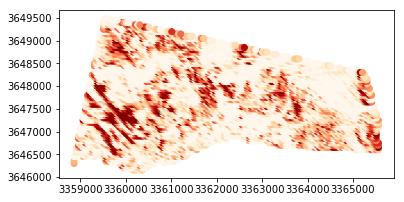

In [21]:
HOGgeo.plot(column='0',cmap='OrRd')
plt.show()

In [22]:
HOGgeo.reset_index(drop=True, inplace=True)

In [23]:
HOGgeo['mindep'] = 0
HOGgeo['drange']= 0
HOGgeo['cellav']=0
HOGgeo['allav']=0

In [24]:
xm = np.ma.masked_invalid(array)
avdep = np.mean(xm)

In [25]:
for index, row in HOGgeo.iterrows():
   
    r = int(HOGgeo.loc[index,['R']].values)
    c = int(HOGgeo.loc[index,['C']].values)
    rmin = r*hogval
    rmax = r*hogval+hogval
    cmin = c*hogval
    cmax = c*hogval+hogval
    
    b = array[rmin:rmax,cmin:cmax]
    b = b.astype('float')
    
    bm = np.ma.masked_invalid(b)
    
    rangez = np.max(bm)-np.min(bm)
    HOGgeo.loc[index,['drange']] = rangez
    
    HOGgeo.loc[index,['cellav']] = np.mean(bm) - np.min(bm)
    HOGgeo.loc[index,['allav']] = avdep - np.min(bm)
    
    b[np.isnan(b)] = 10000
    HOGgeo.loc[index,['mindep']] = np.min(bm)
    
    

/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:758: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = value


In [26]:
#HOGgeo['drange']= 0

In [27]:
HOGgeo['0']=HOGgeo['0'].fillna(0)
HOGgeo['45']=HOGgeo['45'].fillna(0)
HOGgeo['90']=HOGgeo['90'].fillna(0)
HOGgeo['135']=HOGgeo['135'].fillna(0)
HOGgeo['mindep']=HOGgeo['mindep'].fillna(0)
HOGgeo['drange']=HOGgeo['drange'].fillna(0)
HOGgeo['cellav']=HOGgeo['cellav'].fillna(0)
HOGgeo['allav']=HOGgeo['allav'].fillna(0)

In [28]:
HOGgeo.head(100)

,R,C,0,45,90,135,XA,XB,YA,YB,midX,midY,geometry,mindep,drange,cellav,allav
0,0,0,0.0,0.0,0.0,0.0,3.358785e+06,3.358835e+06,3.646076e+06,3.646126e+06,3.358810e+06,3.646101e+06,POINT (3358810.38429132 3646100.702143703),0.000000,0.000000,0.000000,0.000000
1,0,1,0.0,0.0,0.0,0.0,3.358835e+06,3.358885e+06,3.646076e+06,3.646126e+06,3.358860e+06,3.646101e+06,POINT (3358860.38429132 3646100.702143703),0.000000,0.000000,0.000000,0.000000
2,0,2,0.0,0.0,0.0,0.0,3.358885e+06,3.358935e+06,3.646076e+06,3.646126e+06,3.358910e+06,3.646101e+06,POINT (3358910.38429132 3646100.702143703),0.000000,0.000000,0.000000,0.000000
3,0,3,0.0,0.0,0.0,0.0,3.358935e+06,3.358985e+06,3.646076e+06,3.646126e+06,3.358960e+06,3.646101e+06,POINT (3358960.38429132 3646100.702143703),0.000000,0.000000,0.000000,0.000000
4,0,4,0.0,0.0,0.0,0.0,3.358985e+06,3.359035e+06,3.646076e+06,3.646126e+06,3.359010e+06,3.646101e+06,POINT (3359010.38429132 3646100.702143703),0.000000,0.000000,0.000000,0.000000
5,0,5,0.0,0.0,0.0,0.0,3.359035e+06,3.359085e+06,3.646076e+06,3.646126e+06,3.359060e+06,3.646101e+06,POINT (3359060.38429132 3646100.702143703),0.000000,0.000000,0.000000,0.000000
6,0,6,0.0,0.0,0.0,0.0,3.359085e+06,3.359135e+06,3.646076e+06,3.646126e+06,3.359110e+06,3.646101e+06,POINT (3359110.38429132 3646100.702143703),0.000000,0.000000,0.000000,0.000000
7,0,7,0.0,0.0,0.0,0.0,3.359135e+06,3.359185e+06,3.646076e+06,3.646126e+06,3.359160e+06,3.646101e+06,POINT (3359160.38429132 3646100.702143703),0.000000,0.000000,0.000000,0.000000
8,0,8,0.0,0.0,0.0,0.0,3.359185e+06,3.359235e+06,3.646076e+06,3.646126e+06,3.359210e+06,3.646101e+06,POINT (3359210.38429132 3646100.702143703),0.000000,0.000000,0.000000,0.000000
9,0,9,0.0,0.0,0.0,0.0,3.359235e+06,3.359285e+06,3.646076e+06,3.646126e+06,3.359260e+06,3.646101e+06,POINT (3359260.38429132 3646100.702143703),0.000000,0.000000,0.000000,0.000000


In [29]:
#Import selected soundings and project

geometry = [Point(xy) for xy in zip(ss.X, ss.Y)]
crs = {'init': 'epsg:4326'}
ss = gpd.GeoDataFrame(ss, crs=crs, geometry=geometry)

#convert to 3035
ss = ss.to_crs({'init': 'epsg:3035'})

ss['Xp']= ss.geometry.apply(lambda p: p.x)
ss['Yp'] = ss.geometry.apply(lambda p: p.y)

# ss.plot(column='Depth',cmap='OrRd')
# plt.show()

In [30]:
#finding the grid square each sounding in ss is in, saving these hit locations to location

ss['NearestC'] =(ss['Xp'] - minx) /stepxhog
ss['NearestR'] =(ss['Yp'] - miny) /stepyhog

locations = ss.loc[:,['NearestC','NearestR']]

In [31]:
locations

,NearestC,NearestR
0,133.200069,9.953361
1,128.125037,42.513757
2,88.111268,51.662832
3,115.866763,16.574044
4,99.150591,17.489911
5,109.429875,14.174884
6,132.709431,18.012958
7,128.939239,18.001344
8,130.835846,11.059880
9,123.759168,16.246205


In [32]:
floored_locations= locations.apply(np.floor)

In [33]:
len(floored_locations)

92

In [34]:
floored_locations

,NearestC,NearestR
0,133.0,9.0
1,128.0,42.0
2,88.0,51.0
3,115.0,16.0
4,99.0,17.0
5,109.0,14.0
6,132.0,18.0
7,128.0,18.0
8,130.0,11.0
9,123.0,16.0


In [35]:
#floored_locations.loc[56,['NearestR']] = 44

# floored_locations.loc[13,['NearestC']] = 13
# floored_locations.loc[11,['NearestC']] = 13
# floored_locations.loc[0,['NearestC']] = 13

In [36]:
zero_data = np.zeros(shape=(len(floored_locations),13))
positives = pd.DataFrame(zero_data, columns=['A', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'mindep','cellav','allav','drange'])
#positives = pd.DataFrame()

In [37]:
#this is a new method to give the wighted average (based on angles above) for the gradients, also other variables at the index of the floored location (i.e. the grid cell which contains the selected sounding)

for i in range(0,len(floored_locations)):
    fC = floored_locations.iloc[i][0]
    fR = floored_locations.iloc[i][1]
    
     ####Nneed to ask about - using max? or should use the mean? equal weighting
    g = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['0','90','45','135']].values
    positives.loc[i,['A']] = g.max()
    
    #B1
    if fR-1 in range(0,rowH) and fC in range(0,colH):
        h = HOGgeo[(HOGgeo['R'] == fR-1) & (HOGgeo['C'] == fC)].loc[:,['0','90','45','135']].values
        positives.loc[i,['B1']] = h.max()    
    else:
        positives.loc[i,['B1']] = 0
        
    #B2
    if fR-1 in range(0,rowH) and fC+1 in range(0,colH):
        j = HOGgeo[(HOGgeo['R'] == fR-1) & (HOGgeo['C'] == fC+1)].loc[:,['0','90','45','135']].values
        positives.loc[i,['B2']] = j.max()    
    else:
        positives.loc[i,['B2']] = 0

    #B3
    if fR in range(0,rowH) and fC+1 in range(0,colH):
        k = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC+1)].loc[:,['0','90','45','135']].values
        positives.loc[i,['B3']] = k.max()    
    else:
        positives.loc[i,['B3']] = 0

    #B4
    if fR+1 in range(0,rowH) and fC+1 in range(0,colH):
        l = HOGgeo[(HOGgeo['R'] == fR+1) & (HOGgeo['C'] == fC+1)].loc[:,['0','90','45','135']].values
        positives.loc[i,['B4']] = l.max()    
    else:
        positives.loc[i,['B4']] = 0
        
    #B5
    if fR+1 in range(0,rowH) and fC in range(0,colH):
        m = HOGgeo[(HOGgeo['R'] == fR+1) & (HOGgeo['C'] == fC)].loc[:,['0','90','45','135']].values
        positives.loc[i,['B5']] = m.max()    
    else:
        positives.loc[i,['B5']] = 0

    #B6
    if fR+1 in range(0,rowH) and fC-1 in range(0,colH):
        n = HOGgeo[(HOGgeo['R'] == fR+1) & (HOGgeo['C'] == fC-1)].loc[:,['0','90','45','135']].values
        positives.loc[i,['B6']] = n.max()    
    else:
        positives.loc[i,['B6']] = 0

    #B7
    if fR in range(0,rowH) and fC-1 in range(0,colH):
        o = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC-1)].loc[:,['0','90','45','135']].values
        positives.loc[i,['B7']] = o.max()    
    else:
        positives.loc[i,['B7']] = 0

    #B8
    if fR-1 in range(0,rowH) and fC-1 in range(0,colH):
        p = HOGgeo[(HOGgeo['R'] == fR-1) & (HOGgeo['C'] == fC-1)].loc[:,['0','90','45','135']].values
        positives.loc[i,['B8']] = p.max()    
    else:
        positives.loc[i,['B8']] = 0
        
    positives.loc[i,['mindep']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['mindep']].values
    
    positives.loc[i,['cellav']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['cellav']].values
    
    positives.loc[i,['allav']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['allav']].values
    
    positives.loc[i,['drange']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['drange']].values

In [38]:
# positives

In [39]:
o = positives.isnull().sum().sum()
print(o)

0


In [40]:
if o > 0:
    #convert nans to 0
    positives = positives.fillna(0)

In [41]:
positives['Selection']=1

In [42]:
positives

,A,B1,B2,B3,B4,B5,B6,B7,B8,mindep,cellav,allav,drange,Selection
0,0.000000,0.000000,0.000000,0.000000,0.507697,0.309494,0.682504,0.000000,0.000000,9.145833,1.447240,7.426262,2.127244,1
1,0.608155,0.716318,0.349937,0.755490,0.806542,0.835965,0.999945,0.721794,0.846626,16.416000,0.579134,0.156096,1.110923,1
2,0.834775,0.999932,0.999927,0.999921,0.888726,0.930340,0.675070,0.715146,0.999943,23.160000,0.417375,-6.587904,0.865000,1
3,0.486545,0.547201,0.816496,0.503978,0.474249,0.577240,0.489499,0.508273,0.651682,15.628000,0.079925,0.944096,0.200000,1
4,0.655049,0.527831,0.520937,0.582244,0.519113,0.647163,0.827273,0.629403,0.644349,12.828000,0.163112,3.744096,0.597000,1
5,0.739015,0.861629,0.551587,0.739979,0.589914,0.701949,0.587255,0.887230,0.980292,13.964000,0.255688,2.608096,0.528000,1
6,0.731117,0.831833,0.525179,0.768131,0.814254,0.798588,0.529683,0.827585,0.961090,7.725000,1.897947,8.847096,2.936538,1
7,0.821836,0.337225,0.643832,0.400040,0.955263,0.999887,0.505263,0.728342,0.715462,12.923077,1.324237,3.649019,1.936923,1
8,0.737157,0.391567,0.451855,0.439886,0.515262,0.463005,0.609284,0.673775,0.691316,12.620000,1.171771,3.952096,1.692000,1
9,0.449787,0.415371,0.513940,0.921096,0.633307,0.579199,0.541788,0.854980,0.620372,16.212000,0.270493,0.360096,0.376000,1


In [43]:
positives.to_csv(savepath+"HOGpositives_"+survey+"_25_"+str(step)+"m_o4p"+str(hogval)+"b1_"+str(breakdown)+".csv")

In [44]:
#use geopandas to get cell distance from SS

HOGgeo['distoss'] = HOGgeo.geometry.apply(lambda g: ss.distance(g).min())
# HOGgeo.plot(column='distoss',cmap='binary')
# plt.show()

In [45]:
negatives = pd.DataFrame(zero_data, columns=['A', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'mindep','cellav','allav','drange'])

In [46]:
Potential_neg = HOGgeo[(HOGgeo.distoss> 80) & (HOGgeo.distoss< 600)]

print(len(Potential_neg))

7648


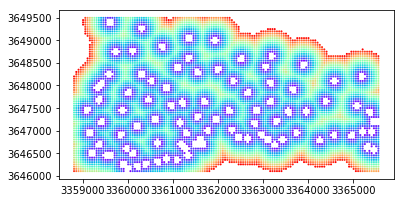

In [47]:
Potential_neg.plot( column='distoss',cmap='rainbow',markersize=1)
plt.show()

In [48]:
 #reset indexes
Potential_neg.reset_index(drop=True, inplace=True)  

In [49]:
negs = int(len(ss)*1.5)
print (negs)

138


In [50]:
from random import randint
t=[randint(0,len(Potential_neg)) for p in range(0,negs)]
print (t)

[1061, 6038, 4286, 4434, 607, 184, 2807, 2068, 2320, 3188, 7136, 2355, 774, 4840, 2645, 2041, 5086, 7499, 3881, 5684, 1328, 4018, 4827, 1698, 2729, 312, 7542, 987, 4677, 6352, 4442, 7491, 73, 5054, 229, 3635, 356, 4273, 7539, 274, 4708, 4626, 2691, 5409, 1962, 2294, 2110, 1811, 923, 7314, 7489, 6099, 1682, 2122, 1867, 1089, 787, 5352, 1164, 2551, 5193, 2673, 3622, 306, 1496, 1309, 7190, 3456, 7318, 7119, 1237, 5550, 6024, 1836, 5955, 2911, 5787, 1022, 5143, 480, 6270, 5915, 5015, 6351, 1322, 1163, 5764, 1258, 5756, 7244, 3642, 7225, 5719, 7422, 2434, 7552, 7533, 3379, 7058, 3643, 3921, 5298, 6922, 1394, 2900, 332, 3857, 3831, 2146, 4392, 7393, 1419, 7565, 6825, 5065, 799, 6926, 7196, 4999, 7566, 6058, 1772, 1543, 6894, 1403, 2449, 1018, 5982, 4361, 453, 6253, 3472, 3373, 6127, 2343, 2939, 4775, 5905]


In [51]:
# select the rows at these indexes (t)
tempdf = pd.DataFrame()
for i in t:
    tempdf = tempdf.append(Potential_neg.iloc[i])

In [52]:
tempdf

,0,135,45,90,C,R,XA,XB,YA,YB,allav,cellav,distoss,drange,geometry,midX,midY,mindep
1061,0.000000,0.000000,0.000000,0.000000,109.0,9.0,3.364235e+06,3.364285e+06,3.646526e+06,3.646576e+06,0.000000,0.000000,233.770478,0.000000,POINT (3364260.38429132 3646550.702143703),3.364260e+06,3.646551e+06,0.000000
6038,0.000000,0.000000,0.000000,0.000000,102.0,50.0,3.363885e+06,3.363935e+06,3.648576e+06,3.648626e+06,-9.043904,0.147363,129.764839,0.213167,POINT (3363910.38429132 3648600.702143703),3.363910e+06,3.648601e+06,25.616000
4286,0.814613,0.000000,0.185274,0.000000,94.0,36.0,3.363485e+06,3.363535e+06,3.647876e+06,3.647926e+06,0.252096,0.383023,166.941436,0.817500,POINT (3363510.38429132 3647900.702143703),3.363510e+06,3.647901e+06,16.320000
4434,0.000000,0.615419,0.000000,0.384330,119.0,37.0,3.364735e+06,3.364785e+06,3.647926e+06,3.647976e+06,-3.919904,0.185674,222.609841,0.328833,POINT (3364760.38429132 3647950.702143703),3.364760e+06,3.647951e+06,20.492000
607,0.000000,0.000000,0.709135,0.290850,18.0,6.0,3.359685e+06,3.359735e+06,3.646376e+06,3.646426e+06,8.416096,2.401705,119.821195,5.124000,POINT (3359710.38429132 3646400.702143703),3.359710e+06,3.646401e+06,8.156000
184,0.000000,0.000000,0.000000,0.000000,37.0,2.0,3.360635e+06,3.360685e+06,3.646176e+06,3.646226e+06,0.000000,0.000000,122.537541,0.000000,POINT (3360660.38429132 3646200.702143703),3.360660e+06,3.646201e+06,0.000000
2807,0.188453,0.220874,0.276758,0.313686,99.0,24.0,3.363735e+06,3.363785e+06,3.647276e+06,3.647326e+06,1.356096,0.168701,216.593058,0.375667,POINT (3363760.38429132 3647300.702143703),3.363760e+06,3.647301e+06,15.216000
2068,0.045692,0.000000,0.461800,0.492409,85.0,18.0,3.363035e+06,3.363085e+06,3.646976e+06,3.647026e+06,4.647096,0.370199,129.512805,0.794231,POINT (3363060.38429132 3647000.702143703),3.363060e+06,3.647001e+06,11.925000
2320,0.000000,0.000000,0.775661,0.224150,89.0,20.0,3.363235e+06,3.363285e+06,3.647076e+06,3.647126e+06,2.897096,0.179425,124.946145,0.409000,POINT (3363260.38429132 3647100.702143703),3.363260e+06,3.647101e+06,13.675000
3188,0.000000,0.000000,0.793542,0.206117,118.0,27.0,3.364685e+06,3.364735e+06,3.647426e+06,3.647476e+06,-1.847135,0.102334,377.255629,0.219231,POINT (3364710.38429132 3647450.702143703),3.364710e+06,3.647451e+06,18.419231


In [53]:
negloc = tempdf.loc[:,['C','R']]

In [54]:
#reset indexes
negloc.reset_index(drop=True, inplace=True)  
#print(negloc)

In [55]:
for i in range(0,len(negloc)):
    nC = negloc.iloc[i][0]
    nR = negloc.iloc[i][1]
    
    ####Nneed to ask about - using max? or should use the mean? equal weighting
    f = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['0','90','45','135']].values
    negatives.loc[i,['A']] = f.max()
        
    #B1
    if nR-1 in range(0,rowH) and nC in range(0,colH):
        h = HOGgeo[(HOGgeo['R'] == nR-1) & (HOGgeo['C'] == nC)].loc[:,['0','90','45','135']].values
        negatives.loc[i,['B1']] = h.max()    
    else:
        negatives.loc[i,['B1']] = 0
        
    #B2
    if nR-1 in range(0,rowH) and nC+1 in range(0,colH):
        j = HOGgeo[(HOGgeo['R'] == nR-1) & (HOGgeo['C'] == nC+1)].loc[:,['0','90','45','135']].values
        negatives.loc[i,['B2']] = j.max()    
    else:
        negatives.loc[i,['B2']] = 0

    #B3
    if nR in range(0,rowH) and nC+1 in range(0,colH):
        k = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC+1)].loc[:,['0','90','45','135']].values
        negatives.loc[i,['B3']] = k.max()    
    else:
        negatives.loc[i,['B3']] = 0

    #B4
    if nR+1 in range(0,rowH) and nC+1 in range(0,colH):
        l = HOGgeo[(HOGgeo['R'] == nR+1) & (HOGgeo['C'] == nC+1)].loc[:,['0','90','45','135']].values
        negatives.loc[i,['B4']] = l.max()    
    else:
        negatives.loc[i,['B4']] = 0
        
    #B5
    if nR+1 in range(0,rowH) and nC in range(0,colH):
        m = HOGgeo[(HOGgeo['R'] == nR+1) & (HOGgeo['C'] == nC)].loc[:,['0','90','45','135']].values
        negatives.loc[i,['B5']] = m.max()    
    else:
        negatives.loc[i,['B5']] = 0

    #B6
    if nR+1 in range(0,rowH) and nC-1 in range(0,colH):
        n = HOGgeo[(HOGgeo['R'] == nR+1) & (HOGgeo['C'] == nC-1)].loc[:,['0','90','45','135']].values
        negatives.loc[i,['B6']] = n.max()    
    else:
        negatives.loc[i,['B6']] = 0

    #B7
    if nR in range(0,rowH) and nC-1 in range(0,colH):
        o = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC-1)].loc[:,['0','90','45','135']].values
        negatives.loc[i,['B7']] = o.max()    
    else:
        negatives.loc[i,['B7']] = 0

    #B8
    if nR-1 in range(0,rowH) and nC-1 in range(0,colH):
        p = HOGgeo[(HOGgeo['R'] == nR-1) & (HOGgeo['C'] == nC-1)].loc[:,['0','90','45','135']].values
        negatives.loc[i,['B8']] = p.max()    
    else:
        negatives.loc[i,['B8']] = 0
        
    negatives.loc[i,['mindep']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['mindep']].values
    
    negatives.loc[i,['cellav']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['cellav']].values
    
    negatives.loc[i,['allav']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['allav']].values
    
    negatives.loc[i,['drange']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['drange']].values

In [56]:
negatives

,A,B1,B2,B3,B4,B5,B6,B7,B8,mindep,cellav,allav,drange
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.999885,0.691199,0.000000,0.000000,0.000000,0.000000,0.000000,0.999873,25.616000,0.147363,-9.043904,0.213167
2,0.814613,0.867389,0.584767,0.778170,0.580891,0.713254,0.525039,0.999856,0.869592,16.320000,0.383023,0.252096,0.817500
3,0.615419,0.566640,0.489058,0.755176,0.611844,0.798961,0.525312,0.807613,0.489432,20.492000,0.185674,-3.919904,0.328833
4,0.709135,0.959937,0.773363,0.864178,0.575936,0.776621,0.617341,0.722627,0.803100,8.156000,2.401705,8.416096,5.124000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.313686,0.467959,0.358286,0.334665,0.394734,0.720160,0.525299,0.588906,0.389693,15.216000,0.168701,1.356096,0.375667
7,0.492409,0.622610,0.919364,0.504572,0.999791,0.999822,0.919873,0.585988,0.748878,11.925000,0.370199,4.647096,0.794231
8,0.775661,0.492509,0.806511,0.793466,0.448890,0.340915,0.462125,0.464833,0.958495,13.675000,0.179425,2.897096,0.409000
9,0.793542,0.603982,0.451388,0.377851,0.743008,0.460427,0.606534,0.786102,0.616618,18.419231,0.102334,-1.847135,0.219231


In [57]:
negatives['Selection']=0

In [58]:
l = negatives.isnull().sum().sum()

In [59]:
if l > 0:
    #convert nans to 0
    negatives = negatives.fillna(0)

In [60]:
negatives.to_csv(savepath+"HOGnegatives_"+survey+"_25_"+str(step)+"m_o4p"+str(hogval)+"b1_"+str(breakdown)+".csv")

##### 